> The top node colored with red in each graph refers to the overall scope of the corresponding graph. All the other red-colored nodes included in each graph are callers to other scopes.

> The green-colored nodes represent parameters that will be passed around scopes.

> In the `Data loader` routine, there is a step of generating the output group pattern (see the blue colored `Generate output group pattern` step in the `Data loader` scope). Initially, when generating the grouping scheme according to the similarity of the absorption spectra, such sub-grouping of detectors were performed individually for each of the final output groups. For the moment, we are staying with the physical banks as the final output grouping scheme and thus the sub-grouping was performed accordingly for each of the physical banks. Such a way of sub-grouping makes it easier to re-group those sub-groups into the final output groups since there is no cross-over among the final output groups in terms of sub-grouping. Then within `Data loader`, at the stage of grouping detectors after a series of operations (absorption correction ,etc.), we then re-group those sub-groups according to which final output group they belong to. This requires us using the spectra ID and using the `GroupingPattern` parameter in the `GroupDetectors` algorithm. The `Generate output group pattern` is for such a purpose.

## Create absorption workspace routine

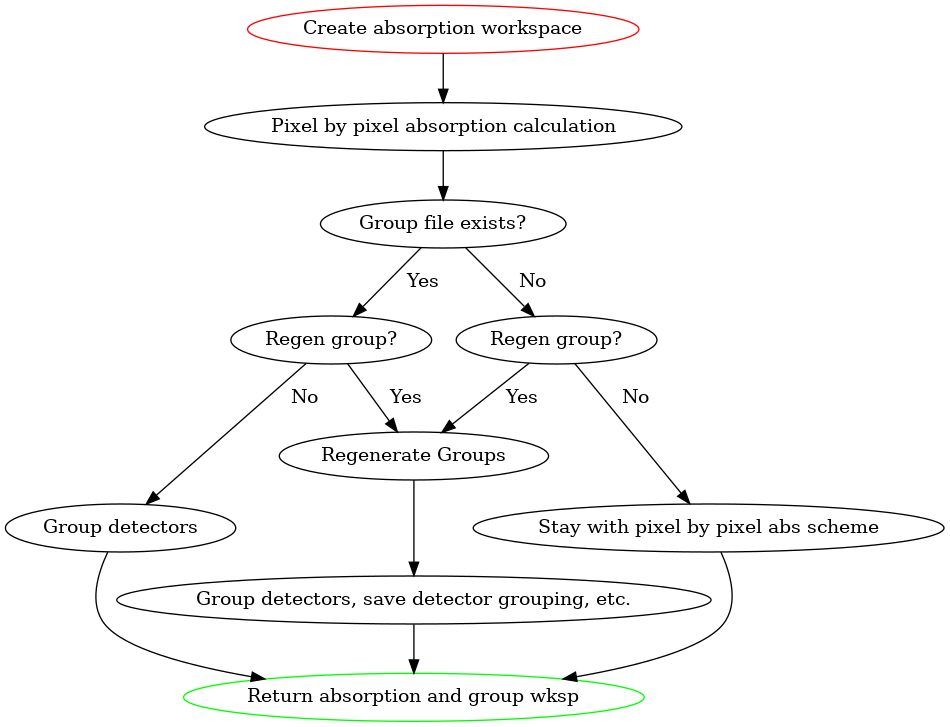

In [8]:
digraph G {
 {node[color=red];"Create absorption workspace"} -> "Pixel by pixel absorption calculation";
 "Pixel by pixel absorption calculation" -> "Group file exists?";
 "Group file exists?" -> {node[label="Regen group?"];"regen_g_1"} [label="  Yes"];
 {node[label="Regen group?"];"regen_g_1"} -> "Regenerate Groups" [label="  Yes"];
 "Regenerate Groups" -> "Group detectors, save detector grouping, etc.";
 "Group detectors, save detector grouping, etc." -> {node[color=green];"Return absorption and group wksp"};
 {node[label="Regen group?"];"regen_g_1"} -> "Group detectors" [label="  No"];
 "Group detectors" -> "Return absorption and group wksp";
 "Group file exists?" -> {node[label="Regen group?"];"regen_g_2"} [label="  No"];
 {node[label="Regen group?"];"regen_g_2"} -> "Regenerate Groups" [label="  Yes"];
 {node[label="Regen group?"];"regen_g_2"} -> "Stay with pixel by pixel abs scheme" [label="  No"];
 "Stay with pixel by pixel abs scheme" -> {node[color=green];"Return absorption and group wksp"};
}

## Sample and Container absorption processing

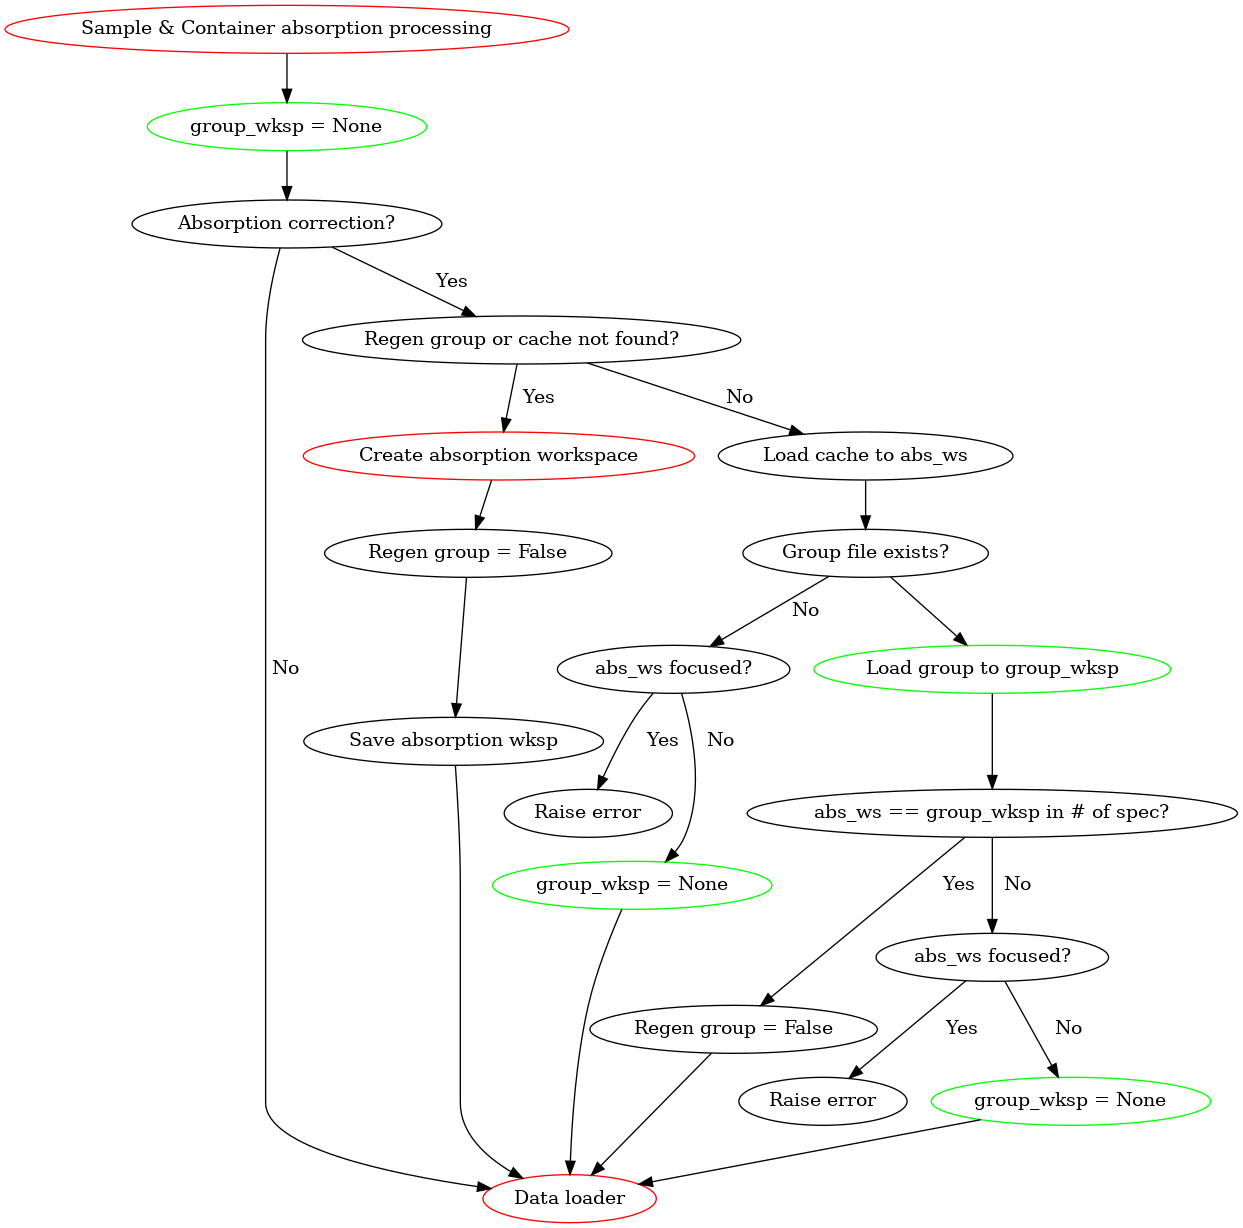

In [21]:
digraph G {
 {node[color=red]; "Sample & Container absorption processing"} -> {node[color=green];"group_wksp = None"};
 {node[color=green];"group_wksp = None"} -> "Absorption correction?";
 "Absorption correction?" -> {node[color=red]; "Data loader"} [label=" No"];
 "Absorption correction?" -> "Regen group or cache not found?" [label="   Yes"];
 "Regen group or cache not found?" -> {node[color=red];"Create absorption workspace"} [label="  Yes"];
 {node[color=red];"Create absorption workspace"} -> {node[label="Regen group = False"];"regen_group_f_2"};
 {node[label="Regen group = False"];"regen_group_f_2"} -> "Save absorption wksp";
 "Save absorption wksp" -> {node[color=red]; "Data loader"};
 "Regen group or cache not found?" -> "Load cache to abs_ws" [label="  No"];
 "Load cache to abs_ws" -> {node[label="Group file exists?"];"gf_exists_1"};
 {node[label="Group file exists?"];"gf_exists_1"} -> "abs_ws focused?" [label="  No"];
 "abs_ws focused?" -> "Raise error" [label="  Yes"];
 "abs_ws focused?" -> {node[label="group_wksp = None";color=green];"group_wksp_none_1"} [label="  No"];
 {node[label="group_wksp = None";color=green];"group_wksp_none_1"} -> {node[color=red]; "Data loader"};
 {node[label="Group file exists?"];"gf_exists_1"} -> {node[color=green];"Load group to group_wksp"};
 {node[color=green];"Load group to group_wksp"} -> "abs_ws == group_wksp in # of spec?";
 "abs_ws == group_wksp in # of spec?" -> "Regen group = False" [label="  Yes"];
 "Regen group = False" -> {node[color=red]; "Data loader"};
 "abs_ws == group_wksp in # of spec?" -> {node[label="abs_ws focused?"];"abs_ws_focused_1"} [label="  No"];
 {node[label="abs_ws focused?"];"abs_ws_focused_1"} -> {node[label="Raise error"];"raise_err_1"} [label="  Yes"];
 {node[label="abs_ws focused?"];"abs_ws_focused_1"} -> {node[label="group_wksp = None";color=green];"group_wksp_none_2"} [label="  No"];
 {node[label="group_wksp = None";color=green];"group_wksp_none_2"} -> {node[color=red]; "Data loader"};
}

## Vanadium absorption processing

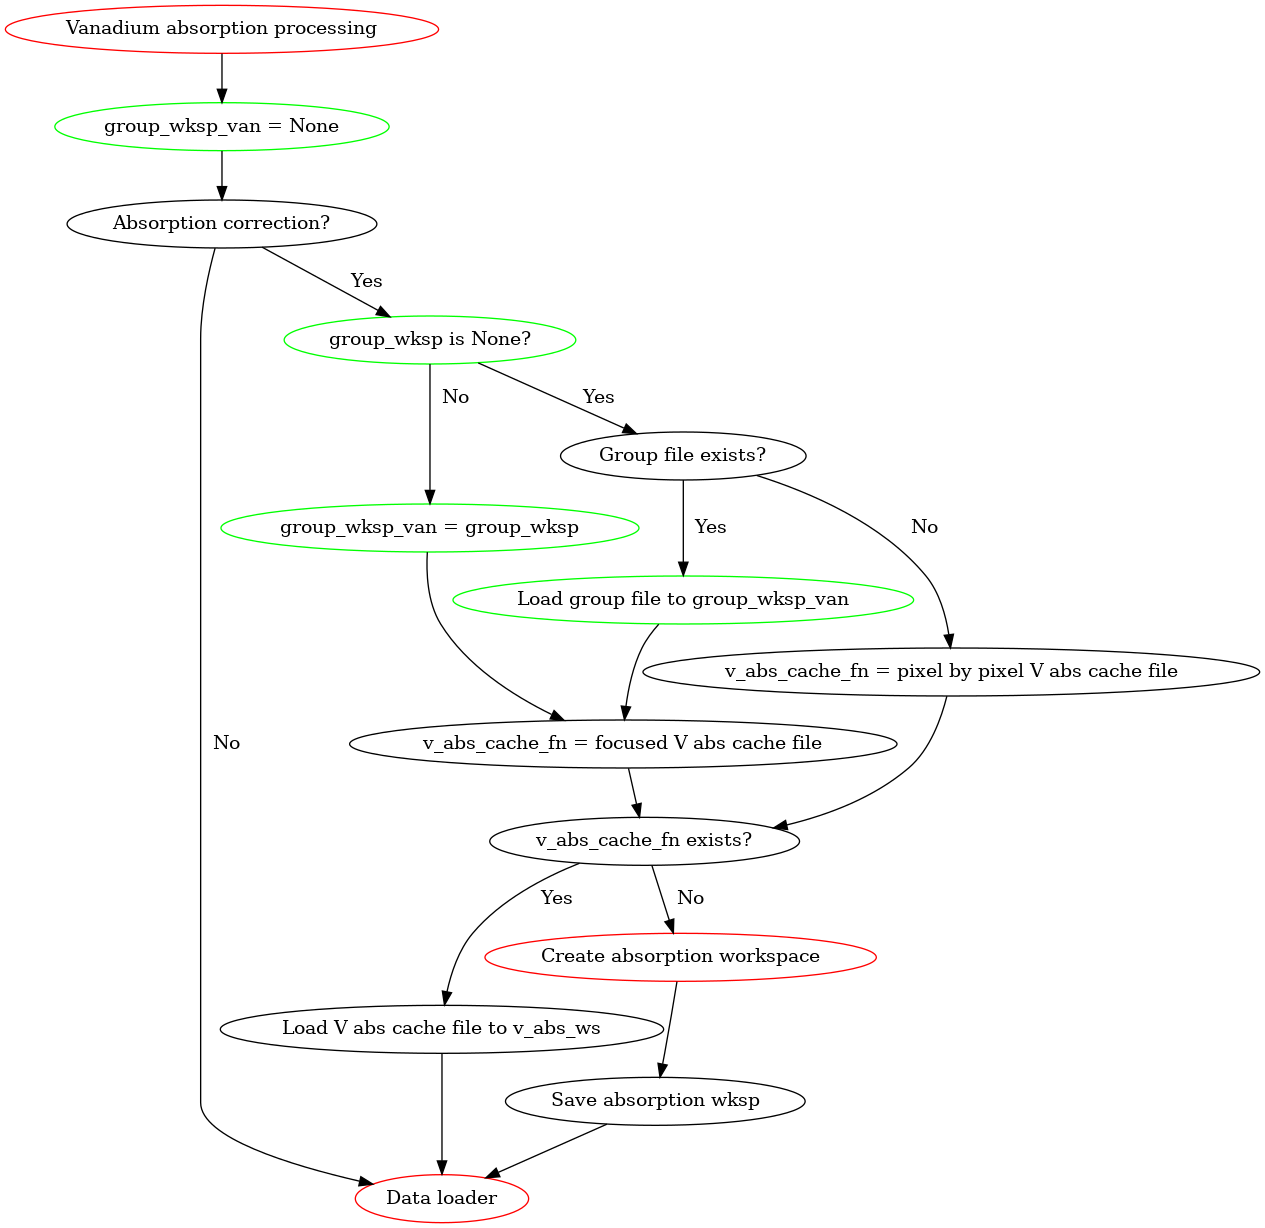

In [22]:
digraph G {
    {node[color=red]; "Vanadium absorption processing"} -> {node[color=green];"group_wksp_van = None"};
    {node[color=green];"group_wksp_van = None"} -> "Absorption correction?";
    "Absorption correction?" -> {node[color=red];"Data loader"} [label="  No"];
    "Absorption correction?" -> {node[color=green];"group_wksp is None?"} [label="  Yes"];
    {node[color=green];"group_wksp is None?"} -> {node[color=green];"group_wksp_van = group_wksp"} [label="  No"];
    {node[color=green];"group_wksp_van = group_wksp"} -> "v_abs_cache_fn = focused V abs cache file";
    "v_abs_cache_fn = focused V abs cache file" -> "v_abs_cache_fn exists?";
    {node[color=green];"group_wksp is None?"} -> "Group file exists?" [label="  Yes"];
    "Group file exists?" -> {node[color=green];"Load group file to group_wksp_van"} [label="  Yes"];
    {node[color=green];"Load group file to group_wksp_van"} -> "v_abs_cache_fn = focused V abs cache file";
    "Group file exists?" -> "v_abs_cache_fn = pixel by pixel V abs cache file" [label="  No"];
    "v_abs_cache_fn = pixel by pixel V abs cache file" -> "v_abs_cache_fn exists?";
    "v_abs_cache_fn exists?" -> "Load V abs cache file to v_abs_ws" [label="   Yes"];
    "Load V abs cache file to v_abs_ws" -> {node[color=red];"Data loader"};
    "v_abs_cache_fn exists?" -> {node[color=red];"Create absorption workspace"} [label="  No"];
    {node[color=red];"Create absorption workspace"} -> "Save absorption wksp";
    "Save absorption wksp" -> {node[color=red];"Data loader"};
}

## Data loader

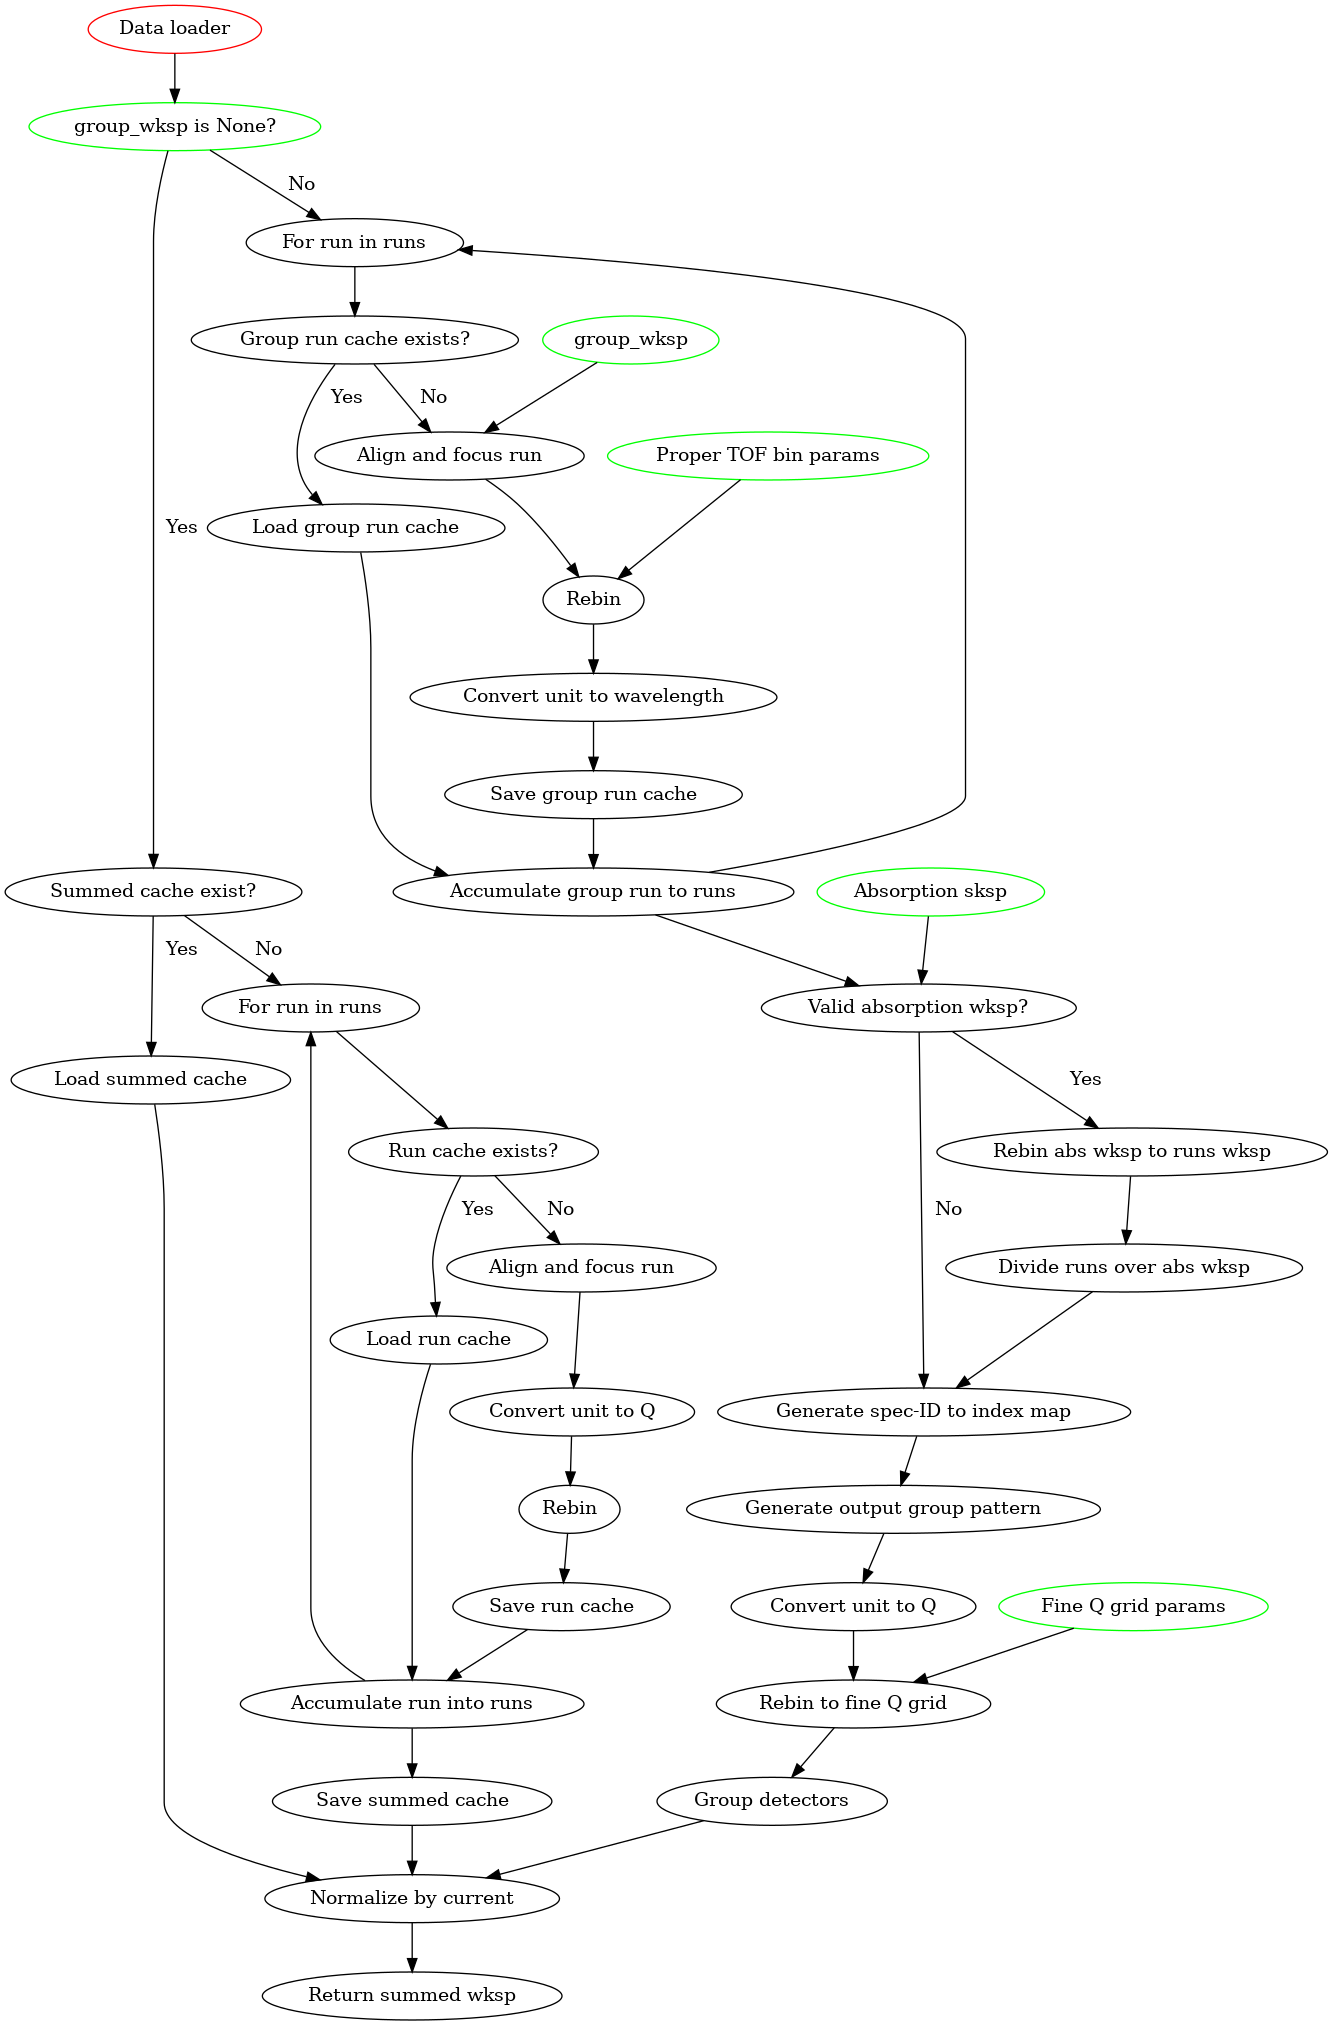

In [23]:
digraph G {
    {node[color=red];"Data loader"} -> {node[color=green];"group_wksp is None?"};
    {node[color=green];"group_wksp is None?"} -> "Summed cache exist?" [label="  Yes"];
    "Summed cache exist?" -> "Load summed cache" [label="  Yes"];
    "Load summed cache" -> "Normalize by current";
    "Normalize by current" -> "Return summed wksp";
    "Summed cache exist?" -> "For run in runs" [label="  No"];
    "For run in runs" -> "Run cache exists?";
    "Run cache exists?" -> "Load run cache" [label="  Yes"];
    "Load run cache" -> "Accumulate run into runs";
    "Accumulate run into runs" -> "Save summed cache";
    "Run cache exists?" -> "Align and focus run" [label="  No"];
    "Align and focus run" -> "Convert unit to Q";
    "Convert unit to Q" -> "Rebin";
    "Rebin" -> "Save run cache";
    "Save run cache" -> "Accumulate run into runs";
    "Accumulate run into runs" -> "For run in runs";
    "Save summed cache" -> "Normalize by current";
    {node[color=green];"group_wksp is None?"} -> {node[label="For run in runs"];loop_runs_1} [label="  No"];
    {node[label="For run in runs"];loop_runs_1} -> {node[label="Group run cache exists?"];"group_run_exists_1"};
    {node[label="Group run cache exists?"];"group_run_exists_1"} -> "Load group run cache" [label="  Yes"];
    {node[label="group_wksp";color=green];group_wksp_3} -> {node[label="Align and focus run"];"align_focus_2"};
    {node[label="Group run cache exists?"];"group_run_exists_1"} -> {node[label="Align and focus run"];"align_focus_2"} [label="  No"];
    {node[label="Align and focus run"];"align_focus_2"} -> {node[label="Rebin"];"rebin_2"};
    {node[color=green];"Proper TOF bin params"} -> {node[label="Rebin"];"rebin_2"};
    {node[label="Rebin"];"rebin_2"} -> {node[label="Convert unit to wavelength"];"convert_unit_w_1"};
    {node[label="Convert unit to wavelength"];"convert_unit_w_1"} -> {node[label="Save group run cache"];"save_group_run_1"};
    "Load group run cache" -> "Accumulate group run to runs";
    {node[label="Save group run cache"];"save_group_run_1"} -> "Accumulate group run to runs";
    "Accumulate group run to runs" -> {node[label="For run in runs"];loop_runs_1};
    {node[label="Absorption sksp";color=green];"abs_wksp_input_1"} -> "Valid absorption wksp?";
    "Accumulate group run to runs" -> "Valid absorption wksp?";
    "Valid absorption wksp?" -> "Rebin abs wksp to runs wksp" [label="  Yes"];
    "Rebin abs wksp to runs wksp" -> "Divide runs over abs wksp";
    "Divide runs over abs wksp" -> "Generate spec-ID to index map";
    "Valid absorption wksp?" -> "Generate spec-ID to index map" [label="  No"];
    "Generate spec-ID to index map" -> "Generate output group pattern";
    "Generate output group pattern" -> {node[label="Convert unit to Q"];"convert_to_q_1"};
    {node[label="Convert unit to Q"];"convert_to_q_1"} -> {node[label="Rebin to fine Q grid"];"rebin_to_fine_q_grid"};
    {node[color=green];"Fine Q grid params"} -> {node[label="Rebin to fine Q grid"];"rebin_to_fine_q_grid"};
    {node[label="Rebin to fine Q grid"];"rebin_to_fine_q_grid"} -> "Group detectors";
    "Group detectors" -> "Normalize by current";
}

## MTS main flow

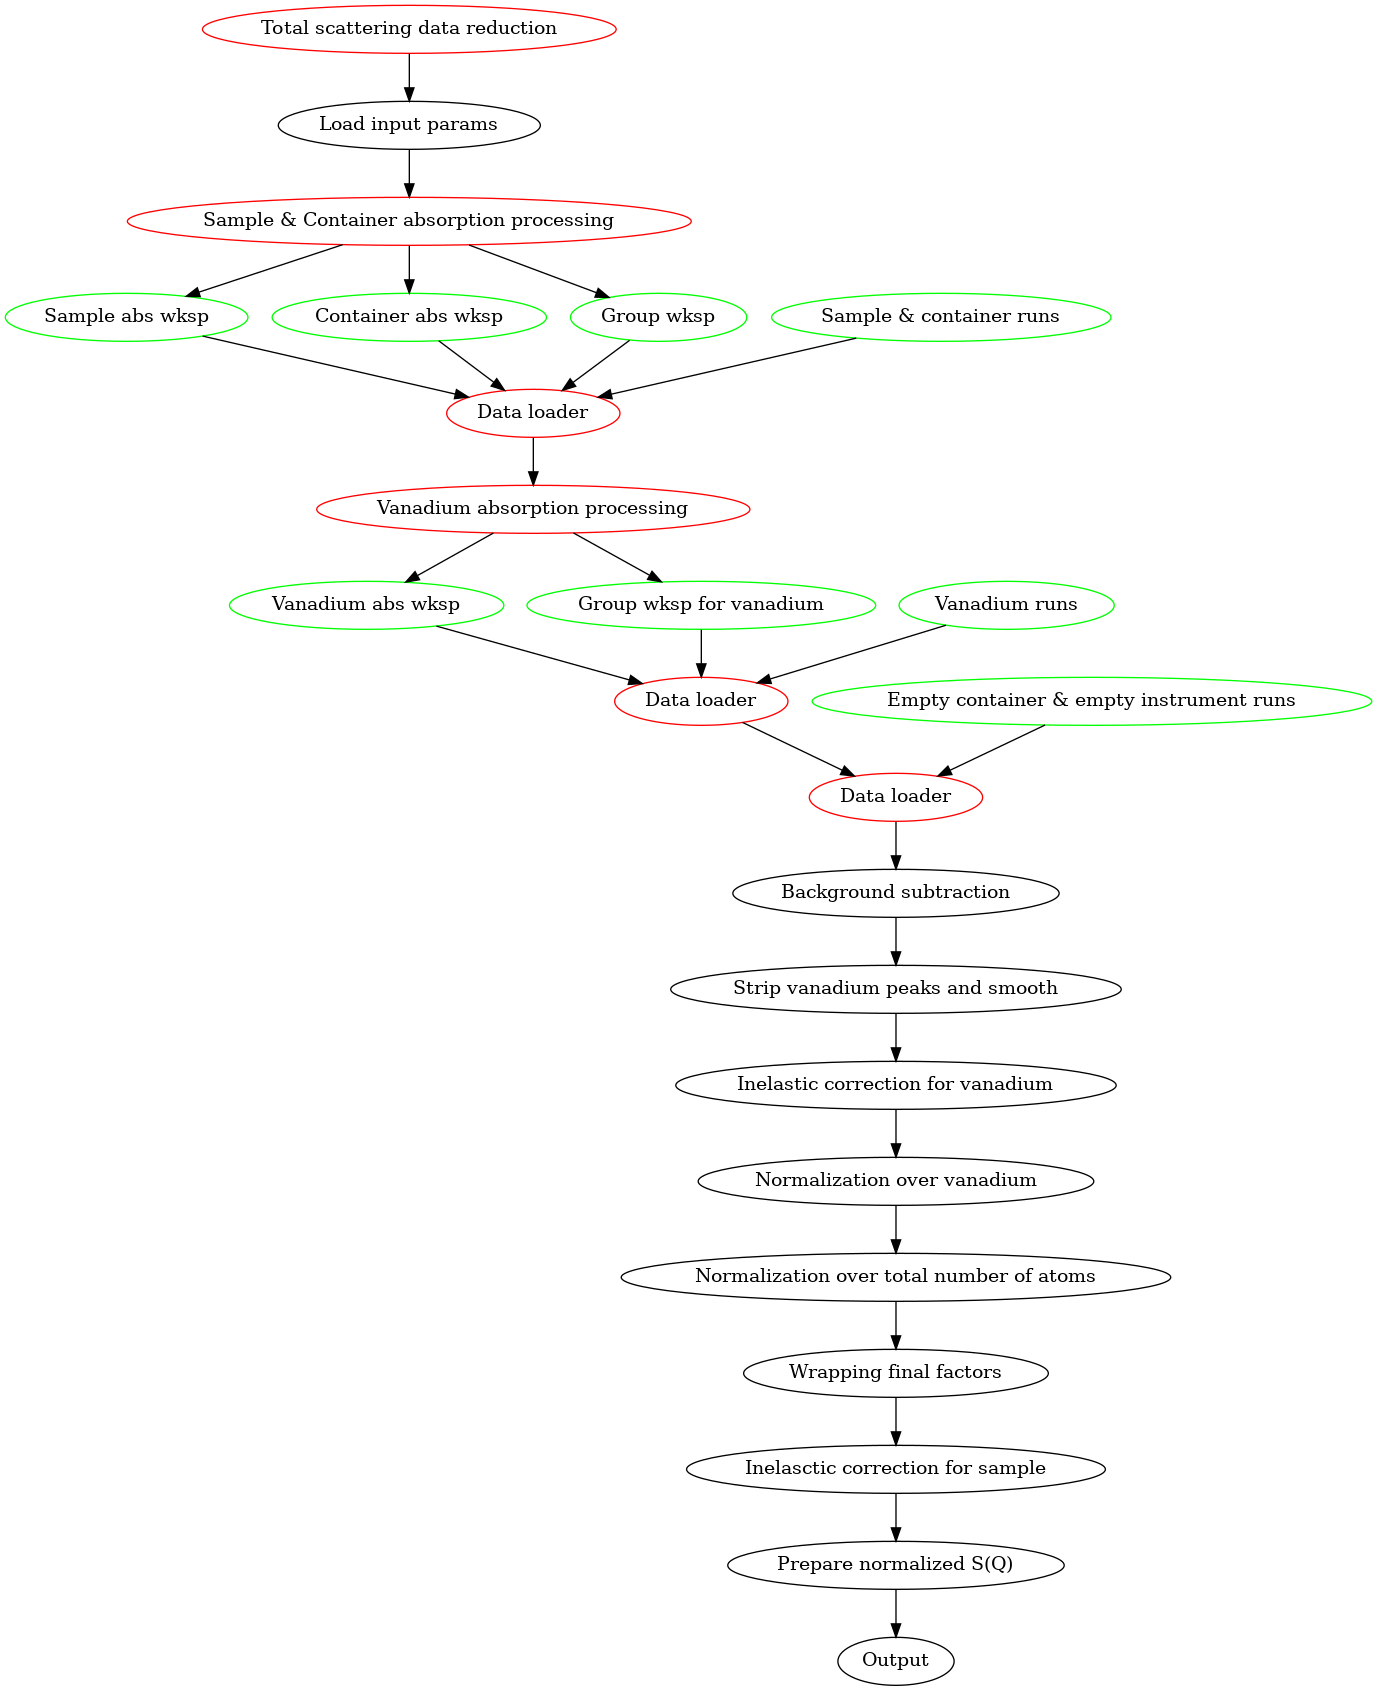

In [53]:
digraph G {
    {node[color=red];"Total scattering data reduction"} -> "Load input params";
    "Load input params" -> {node[color=red];"Sample & Container absorption processing"};
    {node[color=red];"Sample & Container absorption processing"} -> {node[color=green]; "Sample abs wksp", "Container abs wksp", "Group wksp"};
    {node[color=green]; "Sample abs wksp", "Container abs wksp", "Group wksp"} -> {node[color=red,label="Data loader"];"data_loader_sc"};
    {node[color=green];"Sample & container runs"} -> {node[color=red,label="Data loader"];"data_loader_sc"};
    {node[color=red,label="Data loader"];"data_loader_sc"} -> {node[color=red];"Vanadium absorption processing"};
    {node[color=red];"Vanadium absorption processing"} -> {node[color=green];"Vanadium abs wksp"};
    {node[color=red];"Vanadium absorption processing"} -> {node[color=green;label="Group wksp for vanadium"];"group_wksp_van"};
    {node[color=green];"Vanadium abs wksp"} -> {node[color=red,label="Data loader"];"data_loader_van"};
    {node[color=green;label="Group wksp for vanadium"];"group_wksp_van"} -> {node[color=red,label="Data loader"];"data_loader_van"};
    {node[color=green];"Vanadium runs"} -> {node[color=red,label="Data loader"];"data_loader_van"};
    {node[color=red,label="Data loader"];"data_loader_van"} -> {node[color=red,label="Data loader"];"data_loader_bkg"};
    {node[color=green];"Empty container & empty instrument runs"} -> {node[color=red,label="Data loader"];"data_loader_bkg"};
    {node[color=red,label="Data loader"];"data_loader_bkg"} -> "Background subtraction";
    "Background subtraction" -> "Strip vanadium peaks and smooth";
    "Strip vanadium peaks and smooth" -> "Inelastic correction for vanadium";
    "Inelastic correction for vanadium" -> "Normalization over vanadium";
    "Normalization over vanadium" -> "Normalization over total number of atoms";
    "Normalization over total number of atoms" -> "Wrapping final factors";
    "Wrapping final factors" -> "Inelasctic correction for sample";
    "Inelasctic correction for sample" -> "Prepare normalized S(Q)";
    "Prepare normalized S(Q)" -> "Output";
}